### Gaussian Mixture Model (GMM)을 사용하여 2차원 데이터에 대한 클러스터링을 수행하고, 모델이 예측한 로그 가능도를 등고선으로 시각화

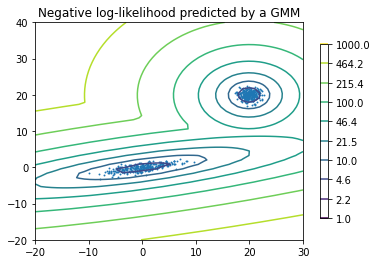

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

from sklearn import mixture

# 샘플 데이터를 생성
n_samples = 300
np.random.seed(0)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])
C = np.array([[0.0, -0.7], [3.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
X_train = np.vstack([shifted_gaussian, stretched_gaussian])


# Gaussian Mixture Model을 초기화하고 학습
clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
clf.fit(X_train)

# 모델에 의해 예측된 스코어(음의 로그 가능도)를 등고선으로 표시
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)  # 음의 로그 가능도를 계산
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()